<h1><center>Titanic Survival Prediction

## Problem Statement:


## Hypothesis:
1. Children, women and the elderly are more likely to survive than other male adults.
2. Persons who paid higher fares are more likely to survive.
3. Persons in a higher class are more likely to survive than those in lower class.

In [1]:
#Libraries
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sb
%matplotlib inline

## Data Acquisition

Load data into a DataFrame from local machine or from the internet url

In [2]:
#Read Data from File
location = r"C:\Users\Latoya Clarke\Documents\Python Scripts\train.csv"
titanic = pd.read_csv(location)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##  Data Exploration

### Variable Identification

First, identify Predictor (Input) and Target (output) variables. Next, identify the data type and category of the variables.

**Survived** will be the target variable and Predictor variables are **Pclass, Sex, Age, Fare**

### Univariate Analysis

At this stage, we explore variables one by one. Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous.

Continuous Variables:- In case of continuous variables, we need to understand the central tendency and spread of the variable. These are measured using various statistical metrics visualization methods.

Categorical Variables:- For categorical variables, we’ll use frequency table to understand distribution of each category. We can also read as percentage of values under each category. It can be be measured using two metrics, Count and Count% against each category. Bar chart can be used as visualization.

In [3]:
titanic.info()

#Age, Cabin, embarked missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 12 columns):
PassengerId    691 non-null int64
Survived       691 non-null int64
Pclass         691 non-null int64
Name           691 non-null object
Sex            691 non-null object
Age            548 non-null float64
SibSp          691 non-null int64
Parch          691 non-null int64
Ticket         691 non-null object
Fare           691 non-null float64
Cabin          155 non-null object
Embarked       690 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 64.9+ KB


In [4]:
titanic.describe()
#Ignore PassengerID, 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,691.000000,691.000000,691.000000,548.000000,691.000000,691.000000,691.000000
mean,346.000000,0.387844,2.308249,29.921989,0.538350,0.387844,32.276103
std,199.618803,0.487612,0.835224,14.598391,1.076585,0.821855,48.447543
min,1.000000,0.000000,1.000000,0.750000,0.000000,0.000000,0.000000
25%,173.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,346.000000,0.000000,3.000000,28.000000,0.000000,0.000000,15.000000
75%,518.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.275000
max,691.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.corr()

#Survived correlate with Parch and weakly with Fare

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.012284,-0.064985,0.100810,-0.074127,0.003507,0.037857
Survived,0.012284,1.000000,-0.318885,-0.077312,-0.033896,0.061689,0.229339
Pclass,-0.064985,-0.318885,1.000000,-0.373770,0.090793,0.013490,-0.568966
Age,0.100810,-0.077312,-0.373770,1.000000,-0.331680,-0.206289,0.085428
SibSp,-0.074127,-0.033896,0.090793,-0.331680,1.000000,0.402487,0.160064
Parch,0.003507,0.061689,0.013490,-0.206289,0.402487,1.000000,0.230892
Fare,0.037857,0.229339,-0.568966,0.085428,0.160064,0.230892,1.000000


In [6]:
#Filter categorical variables
categorical_columns = [x for x in titanic.dtypes.index if titanic.dtypes[x]=='object']

#Exclude ID and irrelevant columns:
categorical_columns = [x for x in categorical_columns if x not in ['PassengerId', 'Cabin','Name', 'Ticket']]

#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories: %s'%col)
    print(titanic[col].value_counts())


Frequency of Categories: Sex
male      442
female    249
Name: Sex, dtype: int64

Frequency of Categories: Embarked
S    497
C    131
Q     62
Name: Embarked, dtype: int64


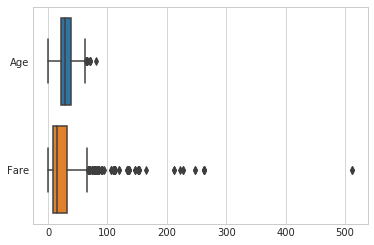

In [7]:
titan = titanic.drop(['PassengerId','Survived', 'Pclass', 'Parch', 'SibSp'], axis =1)
with sb.axes_style('whitegrid'):
    sb.boxplot(data=titan, orient="h");
    

In [8]:
titanic.Pclass.unique()

array([3, 1, 2], dtype=int64)

### Bivariate Analysis

Bi-variate Analysis finds out the relationship between two variables. Here, we look for association and disassociation between variables at a pre-defined significance level. We can perform bi-variate analysis for any combination of categorical and continuous variables.

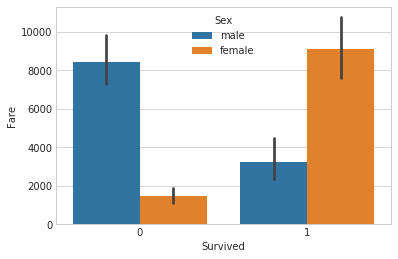

In [9]:
# Showing total Fares
with sb.axes_style('whitegrid'):
    sb.barplot(data=titanic, y = 'Fare', x ='Survived', hue='Sex', estimator = np.sum)

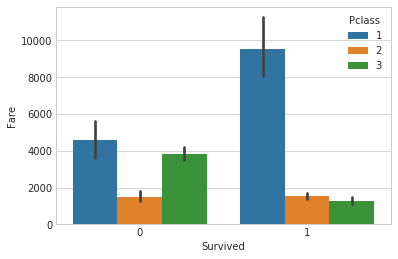

In [10]:
# Showing total Fares
with sb.axes_style('whitegrid'):
    sb.barplot(data=titanic, y = 'Fare', x ='Survived', hue='Pclass', estimator = np.sum)

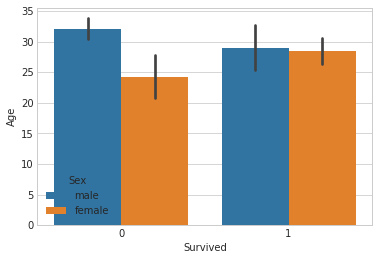

In [11]:
# Showing average ages by sex
with sb.axes_style('whitegrid'):
    sb.barplot(data=titanic, y = 'Age', x ='Survived', hue='Sex', estimator = np.mean)

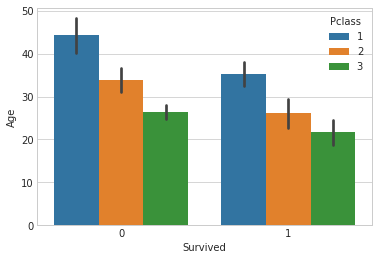

In [12]:
# Showing average ages by sex
with sb.axes_style('whitegrid'):
    sb.barplot(data=titanic, y = 'Age', x ='Survived', hue='Pclass', estimator = np.mean)

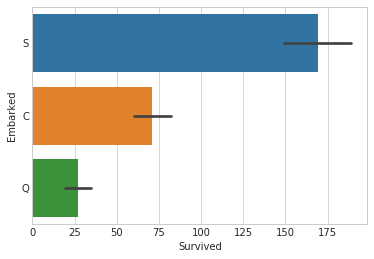

In [13]:
# Showing total servived ages by Embarked
with sb.axes_style('whitegrid'):
    sb.barplot(data=titanic, y = 'Embarked', x ='Survived', estimator = np.sum)


### Missing Value Treatment

Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction or classification.

In [14]:
titanic['Age']= titanic['Age'].fillna(int(titanic['Age'].mean()))
titanic.Age.isnull().any()

False

In [15]:
titanic['Embarked'].mode()

0    S
dtype: object

In [16]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')
titanic.Embarked.isnull().any()

False

### Outlier Detection and Treatment

Outlier can be of two types: Univariate and Multivariate. Above, we have discussed the example of univariate outlier. These outliers can be found when we look at distribution of a single variable. Multi-variate outliers are outliers in an n-dimensional space.
Outliers can drastically change the results of the data analysis and statistical modeling.
Most commonly used method to detect outliers is visualization. We use various visualization methods, like Box-plot, Histogram, Scatter Plots.

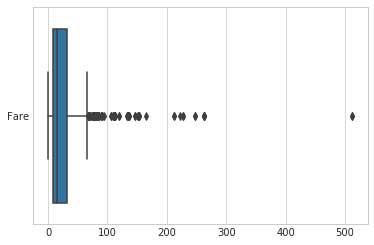

In [17]:
titan = titanic.drop(['PassengerId','Survived', 'Pclass', 'Parch', 'SibSp', 'Age'], axis =1)
with sb.axes_style('whitegrid'):
    sb.boxplot(data=titan, orient="h");

## Feature Engineering

Feature engineering is the science (and art) of extracting more information from existing data. You are actually making the data you already have more useful. Feature engineering itself can be divided in 2 steps:
Variable transformation and
Variable / Feature creation.

### Variable Transformation

In data modelling, transformation refers to the replacement of a variable by a function. In other words, transformation is a process that changes the distribution or relationship of a variable with others.

### Variable Creation

Feature / Variable creation is a process to generate a new variables / features based on existing variable(s).

## Model Building

This is making predictive models on the data

In [18]:
#Creating labels for the dataset
y = np.array(titanic.Survived)

In [19]:
#Creating features for training
titanic_selected = titanic.drop(['PassengerId','Survived','Cabin', 'Ticket', 'SibSp', 'Parch'], axis = 1)
X= titanic_selected.to_dict(orient='records')

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
X = vec.fit_transform(X).toarray()

In [20]:
#Splitting the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [21]:
from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier()

# Train the model using the training sets and check score
model.fit(X_train, y_train)

#Predict Output
predicted= model.predict(X_test)

In [22]:
# Showing accuracy of prediction 
from sklearn.metrics import accuracy_score
print("Accuracy: ", round(100* accuracy_score(predicted, y_test),2),"%")

Accuracy:  82.73 %


##  Data Visualization

Create visualizations for presentation

<center>Shamar Morgan (B.Eng)<center>
<center>Electrical Engineering<center>
<center>*Data Scientist*<center>